# using image generatot TF

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.69072664 0.5926874  0.6083737 ]
  [0.6902584  0.5922192  0.60790545]
  [0.6893842  0.59256285 0.60784316]
  ...
  [0.82245433 0.7636308  0.7753955 ]
  [0.823027   0.7642035  0.7759682 ]
  [0.8540489  0.7952254  0.8069901 ]]

 [[0.69411767 0.59607846 0.6117647 ]
  [0.69411767 0.59607846 0.6117647 ]
  [0.6936837  0.5956445  0.61133075]
  ...
  [0.819645   0.76082146 0.77258617]
  [0.8234952  0.7646717  0.7764364 ]
  [0.85826296 0.79943943 0.81120414]]

 [[0.6983874  0.6003482  0.61603445]
  [0.6941734  0.5961342  0.61182046]
  [0.69411767 0.59607846 0.6117647 ]
  ...
  [0.8200699  0.7612464  0.7730111 ]
  [0.8274354  0.76861185 0.78037655]
  [0.85679394 0.79918814 0.810547  ]]

 ...

 [[0.66801494 0.5778189  0.6083795 ]
  [0.6884602  0.59826404 0.6296366 ]
  [0.66943896 0.5792429  0.61061543]
  ...
  [0.716261   0.6535159  0.6927316 ]
  [0.7176719  0.6549268  0.69414246]
  [0.71954477 0.6567997  0.69601536]]

 [[0.67475903 0.5845629  0.6159355 ]
  [0.6899907  0.5997946  0.6311672 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.55215347 0.5011731  0.54038876]
  [0.5524316  0.50145113 0.5406669 ]
  [0.5527096  0.5017292  0.5409449 ]
  ...
  [0.54824173 0.4933398  0.5521633 ]
  [0.5576494  0.5027474  0.56157094]
  [0.56627285 0.5113709  0.5701944 ]]

 [[0.52785    0.47686955 0.51608527]
  [0.52910125 0.47812083 0.51733655]
  [0.53035253 0.47937214 0.5185878 ]
  ...
  [0.5485198  0.49361786 0.55244136]
  [0.5580664  0.50316447 0.561988  ]
  [0.56641185 0.5115099  0.5703334 ]]

 [[0.52547413 0.47449374 0.5137094 ]
  [0.52477896 0.47379857 0.51301426]
  [0.5240838  0.47310343 0.5123191 ]
  ...
  [0.5487979  0.49389592 0.5527195 ]
  [0.55848354 0.5035816  0.5624051 ]
  [0.5665509  0.51164895 0.5704725 ]]

 ...

 [[0.64152396 0.6140729  0.6454455 ]
  [0.6242435  0.5967925  0.62816507]
  [0.6246382  0.5971872  0.62855977]
  ...
  [0.59792835 0.5508695  0.5900852 ]
  [0.59778935 0.5507305  0.5899462 ]
  [0.5976503  0.55059147 0.58980715]]

 [[0.641941   0.61449003 0.6458626 ]
  [0.62271416 0.5952632  0.62663573]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

model building

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 207s 4s/step - loss: 0.9009 - accuracy: 0.5007 - val_loss: 0.8716 - val_accuracy: 0.6875
Epoch 2/20
47/47 [==============================] - 130s 3s/step - loss: 0.7369 - accuracy: 0.6981 - val_loss: 0.5728 - val_accuracy: 0.6979
Epoch 3/20
47/47 [==============================] - 130s 3s/step - loss: 0.4935 - accuracy: 0.7938 - val_loss: 0.6579 - val_accuracy: 0.6979
Epoch 4/20
47/47 [==============================] - 146s 3s/step - loss: 0.3878 - accuracy: 0.8494 - val_loss: 0.4130 - val_accuracy: 0.7969
Epoch 5/20
47/47 [==============================] - 188s 4s/step - loss: 0.3450 - accuracy: 0.8704 - val_loss: 0.5794 - val_accuracy: 0.7812
Epoch 6/20
47/47 [==============================] - 163s 3s/step - loss: 0.3084 - accuracy: 0.8786 - val_loss: 0.3025 - val_accuracy: 0.8490
Epoch 7/20
47/47 [==============================] - 148s 3s/step - loss: 0.2303 - accuracy: 0.9138 - val_loss: 0.2730 - val_accuracy: 0.8646
Epoch 8/20
47

In [16]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 14s 1000ms/step - loss: 0.1316 - accuracy: 0.9629


In [17]:
scores

[0.13159304857254028, 0.9628770351409912]

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9008957147598267,
 0.7368611097335815,
 0.49348872900009155,
 0.387784868478775,
 0.3449929654598236]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.6875,
 0.6979166865348816,
 0.6979166865348816,
 0.796875,
 0.78125,
 0.8489583134651184,
 0.8645833134651184,
 0.8333333134651184,
 0.859375,
 0.8854166865348816,
 0.921875,
 0.9114583134651184,
 0.9114583134651184,
 0.7916666865348816,
 0.9270833134651184,
 0.9270833134651184,
 0.9635416865348816,
 0.9114583134651184,
 0.9791666865348816,
 0.9739583134651184]

In [26]:
acc

[0.5006784200668335,
 0.6981003880500793,
 0.7937584519386292,
 0.8493894338607788,
 0.8704206347465515,
 0.8785617351531982,
 0.9138398766517639,
 0.9050203561782837,
 0.9172320365905762,
 0.9056987762451172,
 0.9389416575431824,
 0.9497964978218079,
 0.9430122375488281,
 0.9430122375488281,
 0.9124830365180969,
 0.9531885981559753,
 0.9654002785682678,
 0.9586160182952881,
 0.9803256392478943,
 0.9572591781616211]

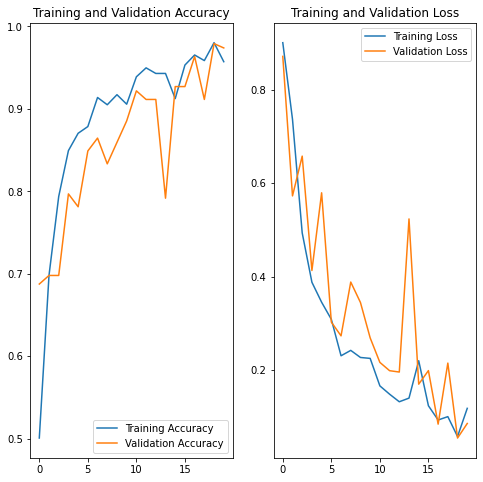

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

In [28]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'labels_batch' is not defined

### Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 56ms/step


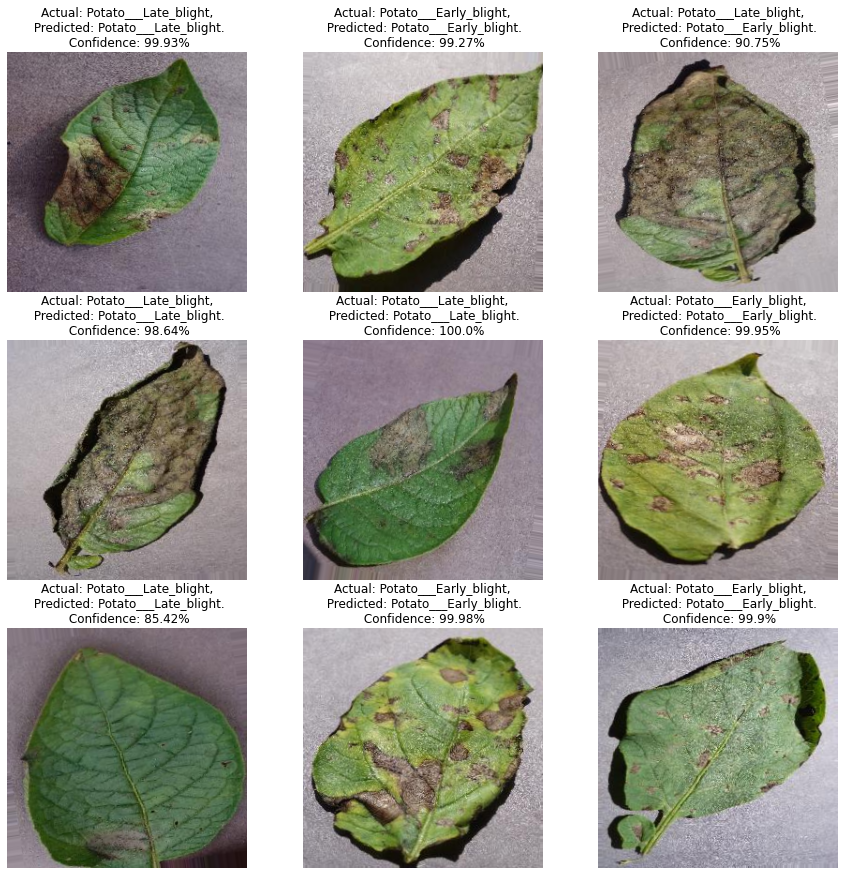

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [31]:
model.save("../potatoes.h5")